In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Define the input shape for the VGG19 model
input_shape = (224, 224, 3)

# Create an instance of the VGG19 model with pre-trained weights
base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

In [3]:
# Freeze the pre-trained layers so they are not trainable
for layer in base_model.layers:
    layer.trainable = False

In [4]:
# Create a new model on top of the pre-trained base model
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Set the number of output classes
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Preprocess the data and create data generators
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
random_state_global = 42
epoch_val = 1000
batch_size_val = 32
threshold_val = 1e-4
IMG_SIZE = (224, 224)
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Define the paths for train and test data
train_dir =  'spectrograms/image_train_spectrograms'
test_dir =  'spectrograms/image_test_spectrograms'

# Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [8]:
# Split the training data into train and validation sets
train_generator = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=True)

train_ds = train_generator.map(lambda x, y: (normalization_layer(x), y))
print(train_ds)

test_generator = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                        label_mode="categorical",
                                                        image_size=IMG_SIZE,
                                                        seed=random_state_global,
                                                        batch_size = batch_size_val,
                                                        shuffle=False) # don't shuffle test data for prediction analysis
#validation_generator = tf.keras.utils.image_dataset_from_directory(val_dir,
#                                                        label_mode="categorical",
#                                                        image_size=IMG_SIZE,
#                                                        seed=random_state_global,
#                                                        batch_size = batch_size_val,
#                                                        shuffle=False) # don't shuffle valid data for prediction analysis

class_names = train_generator.class_names
print(f'\nclass names are {class_names}')

Found 2700 files belonging to 10 classes.
Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>
Found 300 files belonging to 10 classes.

class names are ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [9]:
# my callbacks
my_callbacks = [
            tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, min_delta=1e-4,mode="min",restore_best_weights=False,verbose=1)]
# Train the model
history_1 = model.fit(train_generator,
                        epochs=epoch_val,
                        validation_data=test_generator,
                        callbacks = my_callbacks,
                        verbose=0)

Epoch 13: early stopping


In [10]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


10/10 [==============================] - 41s 4s/step - loss: 0.3312 - accuracy: 0.9100
Test loss: 0.33119454979896545
Test accuracy: 0.9100000262260437


10/10 [==============================] - 40s 4s/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 7, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 1, 8, 8, 8, 8, 5, 8, 8, 8, 8, 8, 6, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 1, 9, 9, 9, 9, 9, 9, 9, 9, 5, 2, 9, 9, 9, 9, 9, 6, 9]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (2).

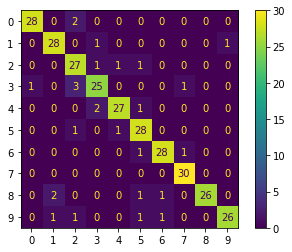

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
y_pred_test = model.predict(test_generator) 

y_pred_test = [np.argmax(class_) for class_ in y_pred_test]
print(y_pred_test) 
# x is the images , y is the class labels,that are in batches .
y_actual = [] 
flag = False 
for x , y in test_generator :
    if flag == False : 
       flag = True 
       sample_pic = x[1] 
    for vec in y :  
        y_actual.append(np.argmax(vec)) 

print(y_actual)
    
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cf_mat = confusion_matrix(y_actual, y_pred_test)
cf_display = ConfusionMatrixDisplay(confusion_matrix = cf_mat , display_labels=l)
cf_display.plot() 
plt.show()